# Recurrent Neural Network (ANN), Long Short Term Momory (LSTM) general workflow

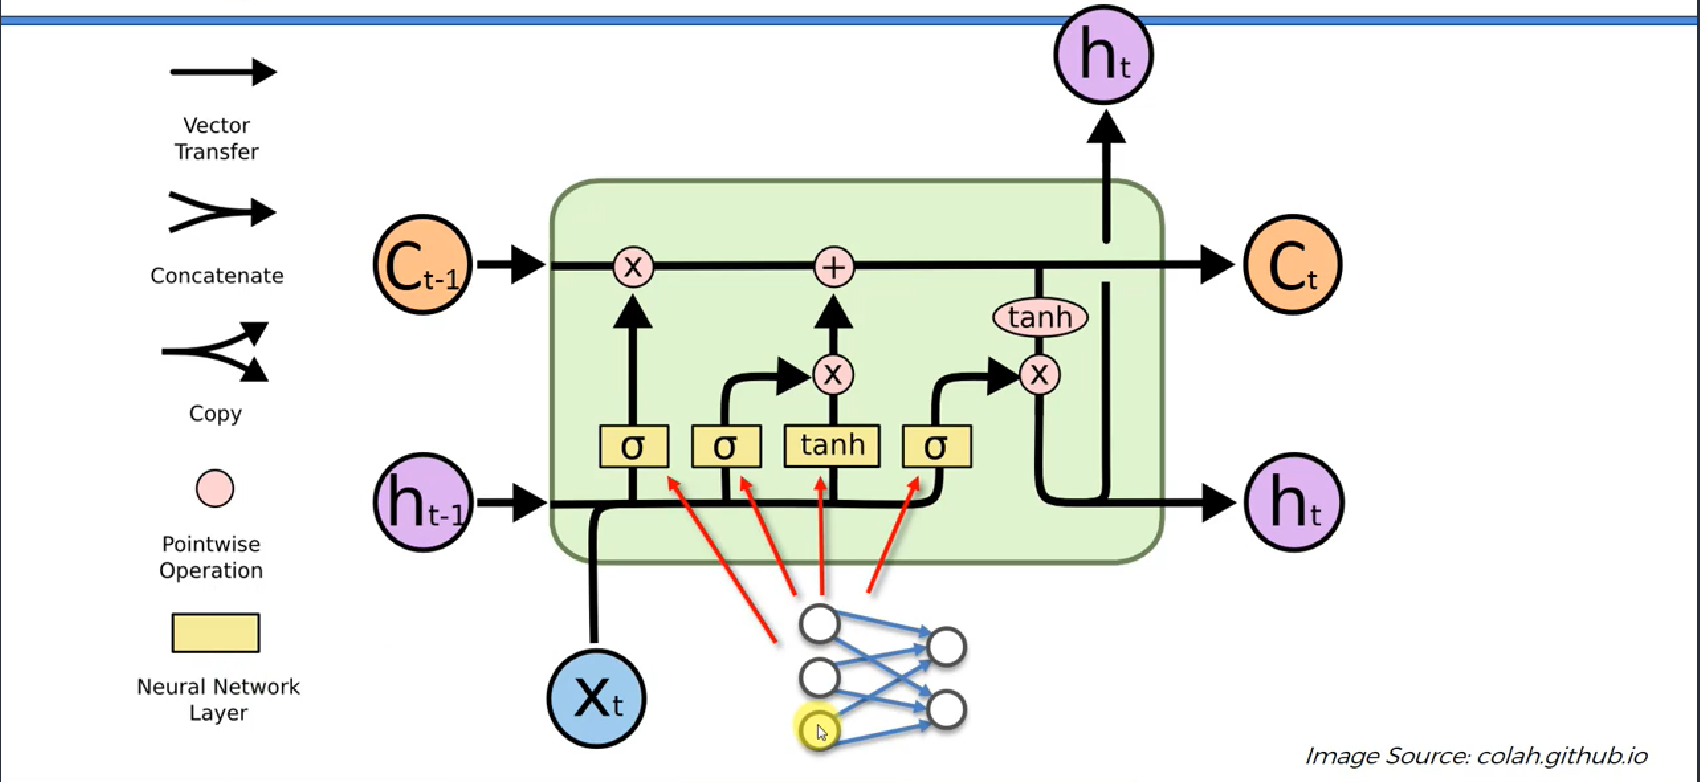

In [18]:
from IPython.display import Image, display_png
display_png(Image('LSTMSchemagic.PNG'))

## Data import
input variable (feature) = 'Open' 
output variable = 'Volume' (USD)
The imported data contains Google's (googl) OHLCV daily stock price from Jan 3rd 2012 to Dec 30th 2016. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the training dataset
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
display(dataset_train.shape)
display(dataset_train)

(1258, 6)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


## Data preprocessing

In [10]:
# it has only the open price
training_set = dataset_train.iloc[:, 1:2].values

#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
##fit = get the min and max value of the argument for normalization
##transform = calc the normalized values
training_set_scaled = sc.fit_transform(training_set)
print("training_set_scaled.shape:{}".format(training_set_scaled.shape))
print("training_set_scaled:{}".format(training_set_scaled))

#create a new data structure having 60 timestep input variables and 1 output (stock price after the last input variable)
X_train , y_train = [], []
for i in range (60, training_set_scaled.shape[0]):
#    one array data
    X_train.append(training_set_scaled[(i-60):i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train , y_train = np.array(X_train), np.array(y_train)
print("X_train.shape:{}".format(X_train.shape))

#reshape
#see https://keras.io/layers/recurrent/#lstm for the necessity of the second argument
#3D tensor with shape (batch_size, timesteps, input_dim).
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print("X_train.shape:{}".format(X_train.shape))

training_set_scaled.shape:(1258, 1)
training_set_scaled:[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]
X_train.shape:(1198, 60)
X_train.shape:(1198, 60, 1)


## Build and train the RNN model 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#initialize the RNN
regressor = Sequential()

#add the first LSTM layer
#since we add another LSTM layer, return_sequences=True
#units = num of dimensions (layers)
regressor.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
#add dropout regularization
regressor.add(Dropout(0.2))

#add the second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
#dropout regularization
regressor.add(Dropout(0.2))

#add the third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
#dropout regularization
regressor.add(Dropout(0.2))

#add the fourth LSTM layer
regressor.add(LSTM(units=50, return_sequences=False))
#dropout regularization
regressor.add(Dropout(0.2))

#add the output layer
regressor.add(Dense(units=1))

#compiling (defining the way of update/back propagation) the RNN 
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#fit the RNN to the training set (training). This process takes time.
regressor.fit(X_train, y_train, epochs = 100, batch_size=32)

You will see the output like this below.
```
Epoch 1/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0541
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0059
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0054

...

1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 96/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0017
Epoch 100/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0014
<keras.callbacks.History at 0x191aceeeac8>
```

## Make the prediction

In [17]:
# import the real stock price in 2017
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
print("dataset_test")
display(dataset_test)

# get only the open price
real_stock_price = dataset_test.iloc[:, 1:2].values

# get the predicted stock price in 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
print("dataset_total")
display(dataset_total.shape)
display(dataset_total) # 1258 + 20 columns 

dataset_test


,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


dataset_total


(1278,)

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
5       313.70
6       310.59
7       314.43
8       311.96
9       314.81
10      312.14
11      319.30
12      294.16
13      291.91
14      292.07
15      287.68
16      284.92
17      284.32
18      287.95
19      290.41
20      291.38
21      291.34
22      294.23
23      296.39
24      302.44
25      303.18
26      304.87
27      302.81
28      304.11
29      304.63
         ...  
1248    800.40
1249    790.22
1250    796.76
1251    795.84
1252    792.36
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
0       778.81
1       788.36
2       786.08
3       795.26
4       806.40
5       807.86
6       805.00
7       807.14
8       807.48
9       807.08
10      805.81
11      805.12
12      806.91
13      807.25
14      822.30
15      829.62
16      837.81
17      834.71
18      814.66
19      796.86
Name: Open, Length: 1278, dtype: float64

In [21]:
#extract the necessary input data for testing
# range((1278 - 20 - 60): 1278)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
print(inputs.shape)
# row column conversion
inputs = inputs.reshape(-1,1)
print(inputs.shape)
#scale the input value. You must not use fit_transform because we want to use the save conversion equation as that of training dataset (https://mathwords.net/fittransform)
inputs = sc.transform(inputs)
#print(inputs)

(80,)
(80, 1)


In [25]:
#create a data structure with 60 timesteps and 1 output for testing
# input variable
X_test = []
for i in range (60, 60 + real_stock_price.shape[0]):
#    one array data
    X_test.append(inputs[(i-60):i, 0])
X_test = np.array(X_test)
print("X_test.shape:{}".format(X_test.shape))

#reshaping
#3D tensor format (batch_size, timesteps, input_dim).
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#run prediction
predicted_stock_price = regressor.predict(X_test)
display("predicted_stock_price",predicted_stock_price)
#convert the scaled values to the original value from the standardized values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
display("predicted_stock_price",predicted_stock_price)

X_test.shape:(20, 60)


'predicted_stock_price'

array([[0.95553327],
       [0.94997275],
       [0.9506208 ],
       [0.9538983 ],
       [0.9610425 ],
       [0.9731575 ],
       [0.98411024],
       [0.98826957],
       [0.9882926 ],
       [0.9871633 ],
       [0.9863322 ],
       [0.9857769 ],
       [0.9855182 ],
       [0.98669016],
       [0.98869693],
       [0.99802613],
       [1.0121564 ],
       [1.0271955 ],
       [1.0350109 ],
       [1.0257227 ]], dtype=float32)

'predicted_stock_price'

array([[792.7764 ],
       [789.78735],
       [790.1357 ],
       [791.8975 ],
       [795.738  ],
       [802.25055],
       [808.13824],
       [810.37415],
       [810.38654],
       [809.7795 ],
       [809.3327 ],
       [809.0342 ],
       [808.89514],
       [809.52515],
       [810.6039 ],
       [815.6189 ],
       [823.2147 ],
       [831.29913],
       [835.5004 ],
       [830.5075 ]], dtype=float32)

## visualize the result

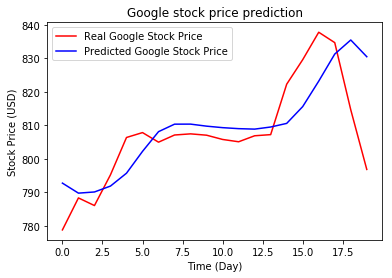

In [27]:
#visualize the result
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time (Day)')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

## evaluate the RNN model

In [28]:
#evaluate the prediction compared to the real stock price by room mean square error (rmse)
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print("rmse: ", rmse)

#divide rmse with predicted_stock_price
#relativeRmse = 
overall_error_rate = rmse / np.mean(predicted_stock_price)
print('overall_error_rate: ',overall_error_rate)


rmse:  11.328841700568361
overall_error_rate:  0.013999363915642276


> From overall_error_rate, the prediction value itself does not very differ from the reail stock prive. However, observing the figure, the predicted price just follow the real price in a few timesteps, which infers that the model would not be so effective for prection in actual system trading.
Additional features and/or indicators would be required.